# Colour Hackathon

Count frequency of colour words in text and plot

### Import libraries

In [1]:
import string
import collections as col
import matplotlib.pyplot as plt

## Part 1: Load Data

### Load Text

In [2]:
filename = 'ColourRemarksLines.txt' # This file is not available to the public, please use your own txt file 
myfile = open(filename, 'r',encoding = 'utf-8') # opens file, 'r' specifies you plan on reading it 
remarks_txt = myfile.read() # reads contents as 1 string and stores as variable
myfile.close() # good coding practice to close the file.
print(remarks_txt[53:59]) # pythonic indexing
len(remarks_txt)

colour


60972

### Load word list of colours

In [3]:
filename_colours = 'colour_names.txt'
myColours = open(filename_colours, 'r',encoding = 'utf-8') 
colours_txt = myColours.read() 
myColours.close() 
print(colours_txt)
print(type(colours_txt)) # prints type of variable


Black Blue Brown Green Grey Orange Pink Purple Red White Yellow
<class 'str'>


## Part 2: Pre-processing

### Pre-process Text
Remove panctuation, convert to case to lower, remove any white spaces and split string into a list of words

In [4]:
translator = str.maketrans('', '', string.punctuation)
remarks_cln = remarks_txt.lower().translate(translator).strip().split() 

### Pre-process Colour Words
Convert to case to lower, remove any white spaces and split string into a list of words

In [5]:
words = colours_txt.lower().strip().split(' ')
print(words)

['black', 'blue', 'brown', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']


## Part 3: Counter

### Count frequency

In [6]:
countFreq = col.Counter(remarks_cln)

### Sort colour word list with their counts

In [7]:
freq = []
for i, word in enumerate (words):
    freq.append(countFreq[words[i]]/len(remarks_cln))
freq, words = zip(*sorted(zip(freq, words),reverse = True))
print(freq,words)

(0.026386006522383636, 0.014230655203083309, 0.012451823302697895, 0.011068287380175906, 0.010672991402312482, 0.007708271568336793, 0.006818855618144086, 0.005237671706690384, 0.0010870639391244194, 0.0004941199723292815, 0.0) ('white', 'green', 'red', 'yellow', 'black', 'blue', 'grey', 'brown', 'orange', 'pink', 'purple')


### Remove words and their frequency with 0 count

Use enumerate() to find any indices for 0 and remove from tuples by slices

In [8]:
idx = [i for i, value in enumerate(freq) if value == 0]
words = words[:idx[0]]
freq = freq[:idx[0]]

## Part 4: Data Visualisation

### Bar plot with default Python colours

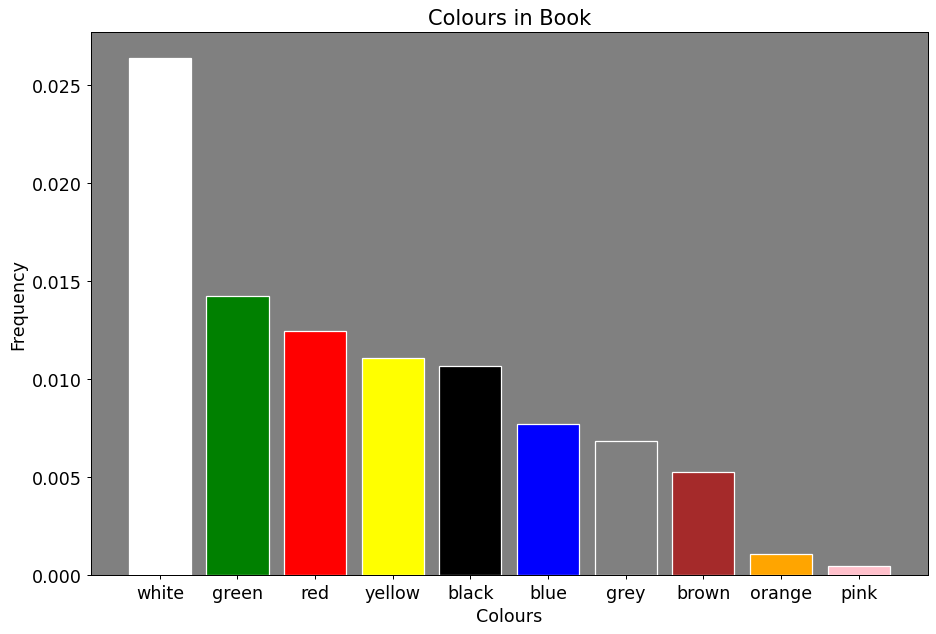

In [9]:
plt.figure(figsize=(12,8), dpi= 90)
plt.rc('font', size=14) 
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")
x_pos = list(range(len(words)))
plt.bar(x_pos, freq, color=words, edgecolor='white')
plt.xlabel('Colours')
plt.ylabel('Frequency')
plt.title('Colours in Book')
plt.xticks(x_pos, words)
plt.show()

### Bar plot with colours from ColourNamer

Colournamer can name colours...

In [18]:
import urllib.request, json 
import pandas as pd
from PIL import ImageColor

In [19]:
def color2name(HEX):
    'Send a HEX and get the most likely colour name back from ColourNamer'
    with urllib.request.urlopen(f'https://colornaming.net/namer/lang/en/name?colour={HEX}') as url:
        data = json.loads(url.read().decode()) 
    # ensure that colour names are sorted
    df = pd.DataFrame.from_dict(data['colours'])
    sorted_df = df.sort_values(by='likelihood', ascending = False)
    name = sorted_df['name'][0]
    return name

# Define your list of HEX values and call color2name function
HEX = ['e598f8','4974a5','989898'] # as many as you like
names = []
for i,j in enumerate (HEX):
    names.append (color2name(j))
print(names)

['pink', 'blue', 'grey']


But it can also return the colour of a name

In [20]:
def name2color(name):
    'Send a name and get the RGB of its centroid from ColourNamer'
    with urllib.request.urlopen(f'http://colornaming.net/namer/lang/en/colours/{name}') as url:
        data = json.loads(url.read().decode())
        rgb = [i/256 for i in ImageColor.getrgb("#" + data['hex'])]
        return rgb

In [12]:
# Call name2color function to get RGBs of colour words
centroids = []
for i,j in enumerate (words):
    try:
        centroids.append (name2color(j))
    except:
        print(f"I don't know what {j} means")  
print(centroids)

[[0.82421875, 0.80078125, 0.8203125], [0.3515625, 0.58984375, 0.3515625], [0.73828125, 0.2421875, 0.22265625], [0.88671875, 0.79296875, 0.3046875], [0.13671875, 0.109375, 0.12109375], [0.328125, 0.4296875, 0.71484375], [0.52734375, 0.5234375, 0.546875], [0.44140625, 0.26953125, 0.16015625], [0.859375, 0.484375, 0.23828125], [0.87890625, 0.4609375, 0.6953125]]


### Bar Plot with Centroids

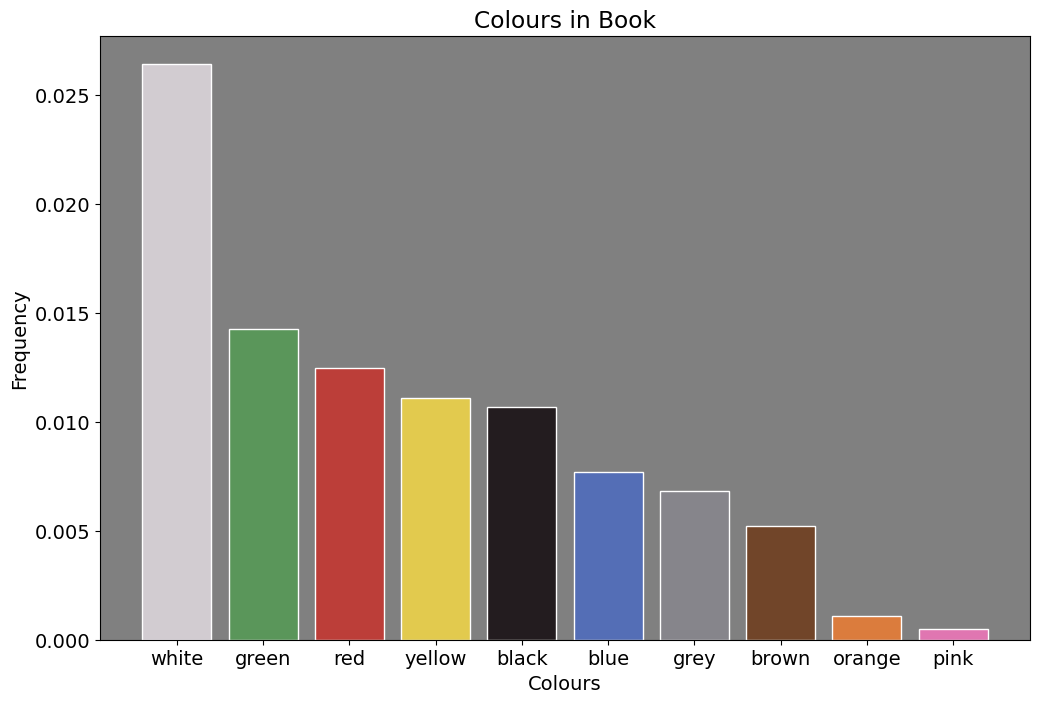

In [13]:
plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
# Setting the background color
ax.set_facecolor("grey")
x_pos = list(range(len(words)))
plt.bar(x_pos, freq, color=centroids, edgecolor='white')
plt.xlabel('Colours')
plt.ylabel('Frequency')
plt.title('Colours in Book')
plt.xticks(x_pos, words)
plt.show()

### Pie chart with centroids

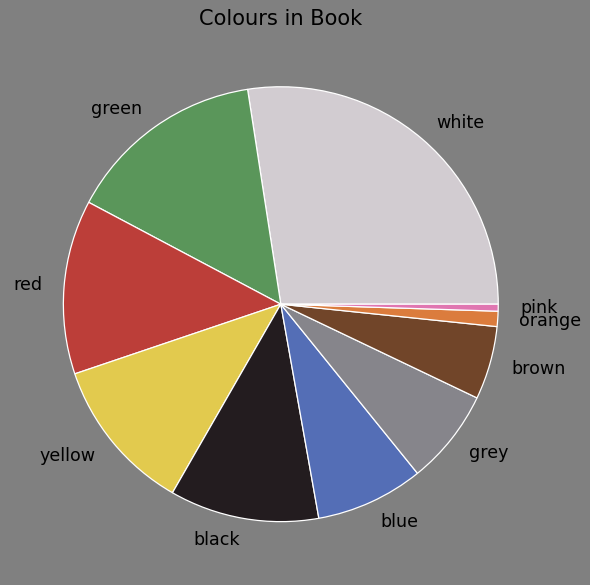

In [14]:
plt.figure(figsize=(12,8), dpi= 90, facecolor='grey')
plt.pie(freq, labels = words, colors=centroids, normalize=True,wedgeprops={'edgecolor':'white'})
plt.title('Colours in Book')
plt.show()

## Conclusions

In [16]:
print(f"The most common colour word in Wittgenstein's Remarks on Colour is {words[0]}. The names of the 6 opponent perceptual categories {words[0:6]} ranked in the top positions and Wittgenstein could have known about opponent theory but he mentioned it {countFreq['opponent']} times.")

The most common colour word in Wittgenstein's Remarks on Colour is white. The names of the 6 opponent perceptual categories ('white', 'green', 'red', 'yellow', 'black', 'blue') ranked in the top positions and Wittgenstein could have known about opponent theory but he mentioned it 0 times.
